In [60]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# pip install scipy


In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from natsort import natsorted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import shap
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.transform import Rotation as R

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.signal import correlate
from scipy.fft import fft
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import entropy


In [63]:
data_train_file_1   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_1.csv')
data_train_file_4   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_4.csv')

data_test_file_2    = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_2.csv')



In [64]:
# a()

In [65]:
data_train = pd.concat([data_train_file_1, data_train_file_4], ignore_index=True)

In [66]:
data_train = data_train.drop(['Unnamed: 0', 'action'], axis = 1)
data_train['operation'] = data_train['operation'].astype('category')

data_test_file_2 = data_test_file_2.drop(['Unnamed: 0', 'action'], axis = 1)
data_test_file_2['operation'] = data_test_file_2['operation'].astype('category')



In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148433 entries, 0 to 148432
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   atr01/acc_x   148433 non-null  float64 
 1   atr01/acc_y   148433 non-null  float64 
 2   atr01/acc_z   148433 non-null  float64 
 3   atr01/gyro_x  148433 non-null  float64 
 4   atr01/gyro_y  148433 non-null  float64 
 5   atr01/gyro_z  148433 non-null  float64 
 6   atr01/quat_w  148433 non-null  float64 
 7   atr01/quat_x  148433 non-null  float64 
 8   atr01/quat_y  148433 non-null  float64 
 9   atr01/quat_z  148433 non-null  float64 
 10  atr02/acc_x   148433 non-null  float64 
 11  atr02/acc_y   148433 non-null  float64 
 12  atr02/acc_z   148433 non-null  float64 
 13  atr02/gyro_x  148433 non-null  float64 
 14  atr02/gyro_y  148433 non-null  float64 
 15  atr02/gyro_z  148433 non-null  float64 
 16  atr02/quat_w  148433 non-null  float64 
 17  atr02/quat_x  148433 non-null

In [68]:
# def calculate_elbow_angle(data, upper_arm_sensor, wrist_sensor):
#     ua = data[[f'{upper_arm_sensor}/acc_x', f'{upper_arm_sensor}/acc_y', f'{upper_arm_sensor}/acc_z']].to_numpy()
#     wf = data[[f'{wrist_sensor}/acc_x', f'{wrist_sensor}/acc_y', f'{wrist_sensor}/acc_z']].to_numpy()
#     vec_forearm = wf - ua
#     dot = np.einsum('ij,ij->i', ua, vec_forearm)
#     norm = np.linalg.norm(ua, axis=1) * np.linalg.norm(vec_forearm, axis=1) + 1e-8
#     return np.degrees(np.arccos(np.clip(dot / norm, -1, 1)))

# def calculate_cross_corr_lag(data, s1, s2, axis='acc_z'):
#     x = data[f'{s1}/{axis}'].values
#     y = data[f'{s2}/{axis}'].values
#     corr = correlate(x - x.mean(), y - y.mean(), mode='full')
#     lag = np.argmax(corr) - (len(y) - 1)
#     return lag

# def compute_AVA(ax, ay, az, gy, gz):
#     sinY = np.sin(gy)
#     sinZ = np.sin(gz)
#     cosY = np.cos(gy)
#     cosZ = np.cos(gz)
#     ava = ax * sinZ + ay * sinY - az * cosY * cosZ
#     return ava

# def complementary_filter(ax, ay, gz, dt=1/30, alpha=0.98):
#     theta = np.zeros_like(ax)
#     for t in range(1, len(ax)):
#         theta_gyro = theta[t-1] + gz[t] * dt
#         theta_acc = np.arctan2(ax[t], ay[t])
#         theta[t] = alpha * theta_gyro + (1 - alpha) * theta_acc
#     return theta


# def feature_extraction(data):
#     for i in range(1, 5):
#         data[f'atr0{i}/acc_mag'] = np.sqrt(
#             data[f'atr0{i}/acc_x']**2 + data[f'atr0{i}/acc_y']**2 + data[f'atr0{i}/acc_z']**2)
#         data[f'atr0{i}/gyro_mag'] = np.sqrt(
#             data[f'atr0{i}/gyro_x']**2 + data[f'atr0{i}/gyro_y']**2 + data[f'atr0{i}/gyro_z']**2)

#     for i in range(1, 5):
#         quat = data[[f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z', f'atr0{i}/quat_w']].to_numpy()
#         rot = R.from_quat(quat)
#         angles = np.linalg.norm(rot.as_rotvec(), axis=1)
#         data[f'atr0{i}/rot_angle_deg'] = np.degrees(angles)

#     for i in [1, 2]:
#         quat = data[[f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z', f'atr0{i}/quat_w']].to_numpy()
#         r = R.from_quat(quat)
#         euler = r.as_euler('xyz', degrees=True)
#         data[f'atr0{i}/roll'] = euler[:, 0]
#         data[f'atr0{i}/pitch'] = euler[:, 1]
#         data[f'atr0{i}/yaw'] = euler[:, 2]

#     for i in [3, 4]:
#         z = data[f'atr0{i}/acc_z']
#         norm = np.sqrt(
#             data[f'atr0{i}/acc_x']**2 + data[f'atr0{i}/acc_y']**2 + data[f'atr0{i}/acc_z']**2) + 1e-8
#         data[f'atr0{i}/arm_elevation'] = np.degrees(np.arccos(np.clip(z / norm, -1, 1)))

#     data['acc_mag_diff_01_02'] = data['atr01/acc_mag'] - data['atr02/acc_mag']
#     data['acc_mag_diff_03_04'] = data['atr03/acc_mag'] - data['atr04/acc_mag']
#     data['acc_mag_diff_01_03'] = data['atr01/acc_mag'] - data['atr03/acc_mag']
#     data['acc_mag_diff_02_04'] = data['atr02/acc_mag'] - data['atr04/acc_mag']

#     data['elbow_angle_right'] = calculate_elbow_angle(data, 'atr03', 'atr01')
#     data['elbow_angle_left'] = calculate_elbow_angle(data, 'atr04', 'atr02')

#     data['lag_right_arm'] = calculate_cross_corr_lag(data, 'atr03', 'atr01', 'acc_z')
#     data['lag_left_arm'] = calculate_cross_corr_lag(data, 'atr04', 'atr02', 'acc_z')

#     for i in [1, 2, 3, 4]:
#         sensor = f'atr0{i}'
#         fft_vals = np.abs(fft(data[f'{sensor}/acc_x'].values))
#         data[f'{sensor}/dominant_freq'] = np.argmax(fft_vals[:len(fft_vals)//2])

#     for i in [1, 2]:
#         data[f'atr0{i}/wrist_stability'] = data[f'atr0{i}/roll'].rolling(window=10, min_periods=1).std()

#     data['pseudo_torque_right'] = (data['atr03/gyro_mag'] - data['atr01/gyro_mag']) * (data['atr03/acc_mag'] + data['atr01/acc_mag']) * 0.3
#     data['pseudo_torque_left'] = (data['atr04/gyro_mag'] - data['atr02/gyro_mag']) * (data['atr04/acc_mag'] + data['atr02/acc_mag']) * 0.3

#     data['wrist_angular_speed'] = data['atr01/gyro_mag'].rolling(window=5, min_periods=1).max()
#     data['upper_arm_acc_before_throw'] = data['atr03/acc_mag'].shift(10).rolling(window=10, min_periods=1).mean()
#     data['elbow_angle_stable'] = data['elbow_angle_right'].rolling(window=15, min_periods=1).std() < 5

#     # Bổ sung đặc trưng nâng cao
#     for i in range(1, 5):
#         data[f'atr0{i}/jerk'] = data[f'atr0{i}/acc_mag'].diff().fillna(0) * 30

#     for i in [1, 2]:
#         data[f'atr0{i}/stillness'] = (data[f'atr0{i}/gyro_mag'] < 5).rolling(window=15, min_periods=1).sum()

#     for i in [1, 2]:
#         data[f'atr0{i}/roll_range'] = data[f'atr0{i}/roll'].rolling(window=30).apply(lambda x: x.max() - x.min(), raw=True)

#     for i in [1, 2, 3, 4]:
#         data[f'atr0{i}/acc_energy'] = data[f'atr0{i}/acc_mag'].rolling(window=30).sum()

#     data['elbow_velocity'] = data['elbow_angle_right'].diff().fillna(0) * 30

#     from scipy.stats import entropy
#     for i in [1, 2]:
#         data[f'atr0{i}/acc_entropy'] = data[f'atr0{i}/acc_mag'].rolling(window=30).apply(
#             lambda x: entropy(np.histogram(x, bins=10, density=True)[0] + 1e-6), raw=True)

#     data['corr_acc_lr'] = data['atr01/acc_mag'].rolling(30).corr(data['atr02/acc_mag'])

#     for i in [3, 4]:
#         data[f'atr0{i}/vertical_orientation'] = data[f'atr0{i}/acc_z'] / (data[f'atr0{i}/acc_mag'] + 1e-6)

#     for i in [3, 4]:
#         sensor = f'atr0{i}'
#         ax = data[f'{sensor}/acc_x'].values
#         ay = data[f'{sensor}/acc_y'].values
#         az = data[f'{sensor}/acc_z'].values
#         gy = data[f'{sensor}/gyro_y'].values  # dùng gyro_y để tính AVA
#         gz = data[f'{sensor}/gyro_z'].values  # dùng gyro_z cho complementary

#         # 1) AVA
#         data[f'{sensor}/ava'] = compute_AVA(ax, ay, az, gy, gz)
#         # 2) Complementary filter angle (radian)
#         data[f'{sensor}/complementary_angle'] = complementary_filter(ax, ay, gz)

#     return data


In [69]:
# def calculate_elbow_angle_quat(window, upper_sensor, wrist_sensor):
#     """Tính góc khuỷu tay sử dụng quaternion cho từng cửa sổ"""
#     upper_quat = window[[f'{upper_sensor}/quat_x',
#                         f'{upper_sensor}/quat_y',
#                         f'{upper_sensor}/quat_z',
#                         f'{upper_sensor}/quat_w']].values
#     wrist_quat = window[[f'{wrist_sensor}/quat_x',
#                         f'{wrist_sensor}/quat_y',
#                         f'{wrist_sensor}/quat_z',
#                         f'{wrist_sensor}/quat_w']].values

#     vec_upper = R.from_quat(upper_quat).apply([0, 0, 1])
#     vec_wrist = R.from_quat(wrist_quat).apply([0, 0, 1])

#     dot = np.einsum('ij,ij->i', vec_upper, vec_wrist)
#     norm = np.linalg.norm(vec_upper, axis=1) * np.linalg.norm(vec_wrist, axis=1) + 1e-8
#     angles = np.degrees(np.arccos(np.clip(dot/norm, -1, 1)))
#     return angles.mean()

# def window_feature_extraction(window):
#     """Trích xuất đặc trưng cho từng cửa sổ"""
#     features = {}

#     # 1. Thống kê cơ bản cho cảm biến
#     sensors = ['atr01', 'atr02', 'atr03', 'atr04']
#     for s in sensors:
#         for ax in ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']:
#             col = f'{s}/{ax}'
#             features[f'{col}_mean'] = window[col].mean()
#             features[f'{col}_std'] = window[col].std()

#     # 2. Góc khuỷu tay sử dụng quaternion
#     features['elbow_angle_right'] = calculate_elbow_angle_quat(window, 'atr03', 'atr01')
#     features['elbow_angle_left'] = calculate_elbow_angle_quat(window, 'atr04', 'atr02')

#     # 3. Độ trễ tương quan chéo trong cửa sổ
#     def _cross_corr(s1, s2, axis='acc_z'):
#         x = window[f'{s1}/{axis}'].values
#         y = window[f'{s2}/{axis}'].values
#         if len(x) < 10 or len(y) < 10:  # Xử lý cửa sổ quá ngắn
#             return 0
#         corr = correlate(x - x.mean(), y - y.mean(), mode='valid')
#         return np.argmax(corr) - len(y) + 1

#     features['lag_right_arm'] = _cross_corr('atr03', 'atr01')
#     features['lag_left_arm'] = _cross_corr('atr04', 'atr02')

#     # 4. Tần số chiếm ưu thế trong cửa sổ
#     for s in sensors:
#         sig = window[f'{s}/acc_x'].values
#         if len(sig) > 10:
#             fft_vals = np.abs(fft(sig))
#             features[f'{s}/dominant_freq'] = np.argmax(fft_vals[:len(fft_vals)//2])
#         else:
#             features[f'{s}/dominant_freq'] = 0

#     # 5. Tính toán các đặc trưng động học
#     for s in sensors:
#         acc_mag = np.sqrt(window[f'{s}/acc_x']**2 +
#                          window[f'{s}/acc_y']**2 +
#                          window[f'{s}/acc_z']**2)
#         features[f'{s}/acc_mag_std'] = acc_mag.std()
#         features[f'{s}/jerk'] = acc_mag.diff().mean() * 30  # Giả sử tần số 30Hz

#     # 6. Thêm các đặc trưng phức tạp khác...

#     return features

# def process_pipeline(data, window_size=30, step_size=15):
#     # Thay vì dùng fillna(method=...), ta dùng ffill và bfill trực tiếp
#     data.ffill(inplace=True)
#     data.bfill(inplace=True)

#     features = []
#     labels = []
#     n = len(data)

#     for start in range(0, n - window_size + 1, step_size):
#         end = start + window_size
#         window = data.iloc[start:end]

#         # Gọi hàm feature extraction cho cửa sổ
#         feats = window_feature_extraction(window)
#         features.append(feats)

#         # Gán nhãn theo mode trong cửa sổ
#         labels.append(window['operation'].mode()[0])

#     feature_df = pd.DataFrame(features)
#     feature_df['operation'] = labels

#     return feature_df


In [70]:
def calculate_elbow_angle_quat(window, upper_sensor, wrist_sensor):
    upper_quat = window[[f'{upper_sensor}/quat_x', f'{upper_sensor}/quat_y', f'{upper_sensor}/quat_z', f'{upper_sensor}/quat_w']].values
    wrist_quat = window[[f'{wrist_sensor}/quat_x', f'{wrist_sensor}/quat_y', f'{wrist_sensor}/quat_z', f'{wrist_sensor}/quat_w']].values

    vec_upper = R.from_quat(upper_quat).apply([0, 0, 1])
    vec_wrist = R.from_quat(wrist_quat).apply([0, 0, 1])

    dot = np.einsum('ij,ij->i', vec_upper, vec_wrist)
    norm = np.linalg.norm(vec_upper, axis=1) * np.linalg.norm(vec_wrist, axis=1) + 1e-8
    angles = np.degrees(np.arccos(np.clip(dot / norm, -1, 1)))
    return angles.mean()


def window_feature_extraction(window):
    features = {}
    sensors = ['atr01', 'atr02', 'atr03', 'atr04']

    for s in sensors:
        for ax in ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']:
            col = f'{s}/{ax}'
            features[f'{col}_mean'] = window[col].mean()
            features[f'{col}_std'] = window[col].std()

    features['elbow_angle_right'] = calculate_elbow_angle_quat(window, 'atr03', 'atr01')
    features['elbow_angle_left'] = calculate_elbow_angle_quat(window, 'atr04', 'atr02')

    def _cross_corr(s1, s2, axis='acc_z'):
        x = window[f'{s1}/{axis}'].values
        y = window[f'{s2}/{axis}'].values
        if len(x) < 10 or len(y) < 10:
            return 0
        corr = correlate(x - x.mean(), y - y.mean(), mode='valid')
        return np.argmax(corr) - len(y) + 1

    features['lag_right_arm'] = _cross_corr('atr03', 'atr01')
    features['lag_left_arm'] = _cross_corr('atr04', 'atr02')

    for s in sensors:
        sig = window[f'{s}/acc_x'].values
        if len(sig) > 10:
            fft_vals = np.abs(fft(sig))
            features[f'{s}/dominant_freq'] = np.argmax(fft_vals[:len(fft_vals)//2])
        else:
            features[f'{s}/dominant_freq'] = 0

    for s in sensors:
        acc_mag = np.sqrt(window[f'{s}/acc_x']**2 + window[f'{s}/acc_y']**2 + window[f'{s}/acc_z']**2)
        features[f'{s}/acc_mag_std'] = acc_mag.std()
        features[f'{s}/jerk'] = acc_mag.diff().mean() * 30

    return features




def feature_extraction(data):
    for i in range(1, 5):
        data[f'atr0{i}/acc_mag'] = np.sqrt(data[f'atr0{i}/acc_x']**2 + data[f'atr0{i}/acc_y']**2 + data[f'atr0{i}/acc_z']**2)
        data[f'atr0{i}/gyro_mag'] = np.sqrt(data[f'atr0{i}/gyro_x']**2 + data[f'atr0{i}/gyro_y']**2 + data[f'atr0{i}/gyro_z']**2)

    for i in range(1, 5):
        quat = data[[f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z', f'atr0{i}/quat_w']].to_numpy()
        rot = R.from_quat(quat)
        angles = np.linalg.norm(rot.as_rotvec(), axis=1)
        data[f'atr0{i}/rot_angle_deg'] = np.degrees(angles)

    for i in [1, 2]:
        quat = data[[f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z', f'atr0{i}/quat_w']].to_numpy()
        r = R.from_quat(quat)
        euler = r.as_euler('xyz', degrees=True)
        data[f'atr0{i}/roll'] = euler[:, 0]
        data[f'atr0{i}/pitch'] = euler[:, 1]
        data[f'atr0{i}/yaw'] = euler[:, 2]

    for i in [3, 4]:
        z = data[f'atr0{i}/acc_z']
        norm = np.sqrt(data[f'atr0{i}/acc_x']**2 + data[f'atr0{i}/acc_y']**2 + data[f'atr0{i}/acc_z']**2) + 1e-8
        data[f'atr0{i}/arm_elevation'] = np.degrees(np.arccos(np.clip(z / norm, -1, 1)))

    data['acc_mag_diff_01_02'] = data['atr01/acc_mag'] - data['atr02/acc_mag']
    data['acc_mag_diff_03_04'] = data['atr03/acc_mag'] - data['atr04/acc_mag']
    data['acc_mag_diff_01_03'] = data['atr01/acc_mag'] - data['atr03/acc_mag']
    data['acc_mag_diff_02_04'] = data['atr02/acc_mag'] - data['atr04/acc_mag']

    data['elbow_angle_right'] = calculate_elbow_angle_quat(data, 'atr03', 'atr01')
    data['elbow_angle_left'] = calculate_elbow_angle_quat(data, 'atr04', 'atr02')

    data['lag_right_arm'] = correlate(data['atr03/acc_z'] - data['atr03/acc_z'].mean(),
                                      data['atr01/acc_z'] - data['atr01/acc_z'].mean(), mode='valid').argmax()
    data['lag_left_arm'] = correlate(data['atr04/acc_z'] - data['atr04/acc_z'].mean(),
                                     data['atr02/acc_z'] - data['atr02/acc_z'].mean(), mode='valid').argmax()

    for i in [1, 2]:
        data[f'atr0{i}/wrist_stability'] = data[f'atr0{i}/roll'].rolling(window=10, min_periods=1).std()

    data['pseudo_torque_right'] = (data['atr03/gyro_mag'] - data['atr01/gyro_mag']) * (data['atr03/acc_mag'] + data['atr01/acc_mag']) * 0.3
    data['pseudo_torque_left'] = (data['atr04/gyro_mag'] - data['atr02/gyro_mag']) * (data['atr04/acc_mag'] + data['atr02/acc_mag']) * 0.3

    data['wrist_angular_speed'] = data['atr01/gyro_mag'].rolling(window=5, min_periods=1).max()
    data['upper_arm_acc_before_throw'] = data['atr03/acc_mag'].shift(10).rolling(window=10, min_periods=1).mean()
    data['elbow_angle_stable'] = data['elbow_angle_right'].rolling(window=15, min_periods=1).std() < 5

    for i in [1, 2]:
        data[f'atr0{i}/stillness'] = (data[f'atr0{i}/gyro_mag'] < 5).rolling(window=15, min_periods=1).sum()
        data[f'atr0{i}/roll_range'] = data[f'atr0{i}/roll'].rolling(window=30).apply(lambda x: x.max() - x.min(), raw=True)
        data[f'atr0{i}/acc_entropy'] = data[f'atr0{i}/acc_mag'].rolling(window=30).apply(lambda x: entropy(np.histogram(x, bins=10, density=True)[0] + 1e-6), raw=True)

    for i in [3, 4]:
        data[f'atr0{i}/vertical_orientation'] = data[f'atr0{i}/acc_z'] / (data[f'atr0{i}/acc_mag'] + 1e-6)

    return data


def process_pipeline(data, window_size=30, step_size=15):
    data.ffill(inplace=True)
    data.bfill(inplace=True)
    data = feature_extraction(data)

    features = []
    labels = []
    for start in range(0, len(data) - window_size + 1, step_size):
        end = start + window_size
        window = data.iloc[start:end]
        feats = window_feature_extraction(window)
        features.append(feats)
        labels.append(window['operation'].mode()[0])

    feature_df = pd.DataFrame(features)
    feature_df['operation'] = labels
    return feature_df


In [71]:
data_train          = process_pipeline(data_train)
data_test_file_2    = process_pipeline(data_test_file_2)

In [72]:
data_train.columns

Index(['atr01/acc_x_mean', 'atr01/acc_x_std', 'atr01/acc_y_mean',
       'atr01/acc_y_std', 'atr01/acc_z_mean', 'atr01/acc_z_std',
       'atr01/gyro_x_mean', 'atr01/gyro_x_std', 'atr01/gyro_y_mean',
       'atr01/gyro_y_std', 'atr01/gyro_z_mean', 'atr01/gyro_z_std',
       'atr02/acc_x_mean', 'atr02/acc_x_std', 'atr02/acc_y_mean',
       'atr02/acc_y_std', 'atr02/acc_z_mean', 'atr02/acc_z_std',
       'atr02/gyro_x_mean', 'atr02/gyro_x_std', 'atr02/gyro_y_mean',
       'atr02/gyro_y_std', 'atr02/gyro_z_mean', 'atr02/gyro_z_std',
       'atr03/acc_x_mean', 'atr03/acc_x_std', 'atr03/acc_y_mean',
       'atr03/acc_y_std', 'atr03/acc_z_mean', 'atr03/acc_z_std',
       'atr03/gyro_x_mean', 'atr03/gyro_x_std', 'atr03/gyro_y_mean',
       'atr03/gyro_y_std', 'atr03/gyro_z_mean', 'atr03/gyro_z_std',
       'atr04/acc_x_mean', 'atr04/acc_x_std', 'atr04/acc_y_mean',
       'atr04/acc_y_std', 'atr04/acc_z_mean', 'atr04/acc_z_std',
       'atr04/gyro_x_mean', 'atr04/gyro_x_std', 'atr04/gyro_y_mea

In [73]:
# data_train = sliding_window_stats_acc_gyro(sliding_window_stats_acc_gyro)


In [74]:
def fill_nan(df):
  cols_to_fill = [col for col in df.columns if col != 'operation']
  df[cols_to_fill] = df[cols_to_fill].fillna(method='ffill')
  df[cols_to_fill] = df[cols_to_fill].fillna(method='bfill')

In [75]:
data_train.columns

Index(['atr01/acc_x_mean', 'atr01/acc_x_std', 'atr01/acc_y_mean',
       'atr01/acc_y_std', 'atr01/acc_z_mean', 'atr01/acc_z_std',
       'atr01/gyro_x_mean', 'atr01/gyro_x_std', 'atr01/gyro_y_mean',
       'atr01/gyro_y_std', 'atr01/gyro_z_mean', 'atr01/gyro_z_std',
       'atr02/acc_x_mean', 'atr02/acc_x_std', 'atr02/acc_y_mean',
       'atr02/acc_y_std', 'atr02/acc_z_mean', 'atr02/acc_z_std',
       'atr02/gyro_x_mean', 'atr02/gyro_x_std', 'atr02/gyro_y_mean',
       'atr02/gyro_y_std', 'atr02/gyro_z_mean', 'atr02/gyro_z_std',
       'atr03/acc_x_mean', 'atr03/acc_x_std', 'atr03/acc_y_mean',
       'atr03/acc_y_std', 'atr03/acc_z_mean', 'atr03/acc_z_std',
       'atr03/gyro_x_mean', 'atr03/gyro_x_std', 'atr03/gyro_y_mean',
       'atr03/gyro_y_std', 'atr03/gyro_z_mean', 'atr03/gyro_z_std',
       'atr04/acc_x_mean', 'atr04/acc_x_std', 'atr04/acc_y_mean',
       'atr04/acc_y_std', 'atr04/acc_z_mean', 'atr04/acc_z_std',
       'atr04/gyro_x_mean', 'atr04/gyro_x_std', 'atr04/gyro_y_mea

In [76]:
data_test_file_2.columns

Index(['atr01/acc_x_mean', 'atr01/acc_x_std', 'atr01/acc_y_mean',
       'atr01/acc_y_std', 'atr01/acc_z_mean', 'atr01/acc_z_std',
       'atr01/gyro_x_mean', 'atr01/gyro_x_std', 'atr01/gyro_y_mean',
       'atr01/gyro_y_std', 'atr01/gyro_z_mean', 'atr01/gyro_z_std',
       'atr02/acc_x_mean', 'atr02/acc_x_std', 'atr02/acc_y_mean',
       'atr02/acc_y_std', 'atr02/acc_z_mean', 'atr02/acc_z_std',
       'atr02/gyro_x_mean', 'atr02/gyro_x_std', 'atr02/gyro_y_mean',
       'atr02/gyro_y_std', 'atr02/gyro_z_mean', 'atr02/gyro_z_std',
       'atr03/acc_x_mean', 'atr03/acc_x_std', 'atr03/acc_y_mean',
       'atr03/acc_y_std', 'atr03/acc_z_mean', 'atr03/acc_z_std',
       'atr03/gyro_x_mean', 'atr03/gyro_x_std', 'atr03/gyro_y_mean',
       'atr03/gyro_y_std', 'atr03/gyro_z_mean', 'atr03/gyro_z_std',
       'atr04/acc_x_mean', 'atr04/acc_x_std', 'atr04/acc_y_mean',
       'atr04/acc_y_std', 'atr04/acc_z_mean', 'atr04/acc_z_std',
       'atr04/gyro_x_mean', 'atr04/gyro_x_std', 'atr04/gyro_y_mea

In [77]:
for i in data_train.columns:
  print(i)

atr01/acc_x_mean
atr01/acc_x_std
atr01/acc_y_mean
atr01/acc_y_std
atr01/acc_z_mean
atr01/acc_z_std
atr01/gyro_x_mean
atr01/gyro_x_std
atr01/gyro_y_mean
atr01/gyro_y_std
atr01/gyro_z_mean
atr01/gyro_z_std
atr02/acc_x_mean
atr02/acc_x_std
atr02/acc_y_mean
atr02/acc_y_std
atr02/acc_z_mean
atr02/acc_z_std
atr02/gyro_x_mean
atr02/gyro_x_std
atr02/gyro_y_mean
atr02/gyro_y_std
atr02/gyro_z_mean
atr02/gyro_z_std
atr03/acc_x_mean
atr03/acc_x_std
atr03/acc_y_mean
atr03/acc_y_std
atr03/acc_z_mean
atr03/acc_z_std
atr03/gyro_x_mean
atr03/gyro_x_std
atr03/gyro_y_mean
atr03/gyro_y_std
atr03/gyro_z_mean
atr03/gyro_z_std
atr04/acc_x_mean
atr04/acc_x_std
atr04/acc_y_mean
atr04/acc_y_std
atr04/acc_z_mean
atr04/acc_z_std
atr04/gyro_x_mean
atr04/gyro_x_std
atr04/gyro_y_mean
atr04/gyro_y_std
atr04/gyro_z_mean
atr04/gyro_z_std
elbow_angle_right
elbow_angle_left
lag_right_arm
lag_left_arm
atr01/dominant_freq
atr02/dominant_freq
atr03/dominant_freq
atr04/dominant_freq
atr01/acc_mag_std
atr01/jerk
atr02/acc_mag

In [78]:
# a()

In [79]:

print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)

data_train.dropna(inplace=True)
data_test_file_2.dropna(inplace=True)


print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)



Kích thước dữ liệu train: (9894, 65)
Kích thước dữ liệu test: (4318, 65)
Kích thước dữ liệu train: (9894, 65)
Kích thước dữ liệu test: (4318, 65)


In [80]:
target = "operation"

X_train = data_train.drop(target, axis=1)
y_train = data_train[target]

X_test = data_test_file_2.drop(target, axis=1)
y_test = data_test_file_2[target]

In [81]:
# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Trước SMOTE:", pd.Series(y_train_encoded).value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Sau SMOTE:", pd.Series(y_train_resampled).value_counts())

print("Nhãn trong y_train_resampled:", np.unique(y_train_resampled))
print("Nhãn trong y_test_encoded:", np.unique(y_test_encoded))


Trước SMOTE: 2     1514
0     1391
1     1336
6     1189
3     1179
4      855
7      640
9      600
5      410
10     401
8      379
Name: count, dtype: int64
Sau SMOTE: 0     1514
1     1514
2     1514
10    1514
3     1514
4     1514
5     1514
6     1514
7     1514
8     1514
9     1514
Name: count, dtype: int64
Nhãn trong y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10]
Nhãn trong y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10]



🔍 Đang huấn luyện mô hình: Random Forest
AUROC của Random Forest: 0.9445
              precision    recall  f1-score   support

         100       0.48      1.00      0.65       436
         200       0.36      0.17      0.23       709
         300       0.76      1.00      0.87       616
         400       0.99      0.86      0.92       426
         500       1.00      0.55      0.71       330
         600       1.00      0.06      0.11       172
         700       0.96      0.99      0.98       676
         800       0.89      0.96      0.92       298
         900       0.83      0.86      0.84       253
        1000       0.95      0.11      0.20       324
        8100       0.02      0.08      0.03        78

    accuracy                           0.68      4318
   macro avg       0.75      0.60      0.59      4318
weighted avg       0.76      0.68      0.66      4318



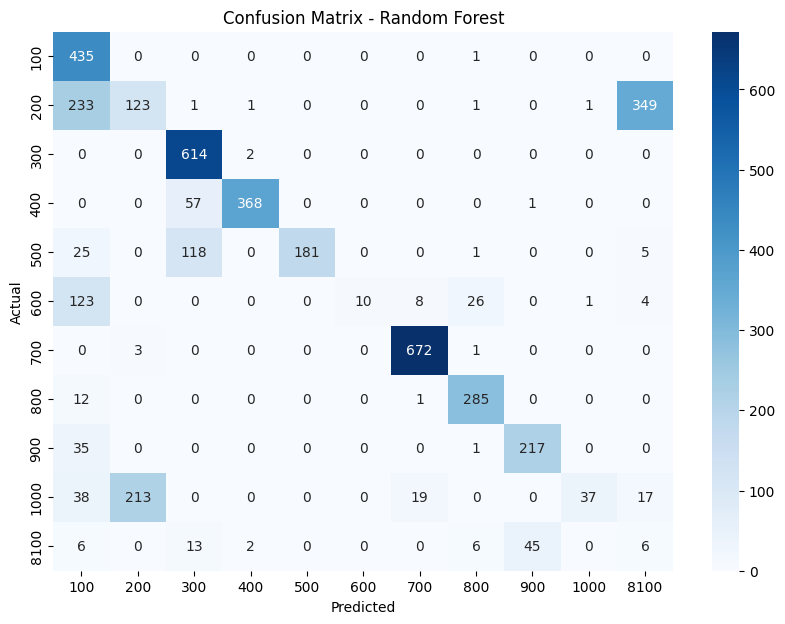


🔍 Đang huấn luyện mô hình: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUROC của Logistic Regression: 0.9600
              precision    recall  f1-score   support

         100       0.59      0.84      0.69       436
         200       0.55      0.24      0.33       709
         300       0.83      0.90      0.86       616
         400       0.83      0.95      0.88       426
         500       0.88      0.56      0.68       330
         600       0.66      0.88      0.75       172
         700       0.83      0.99      0.91       676
         800       0.83      0.83      0.83       298
         900       0.50      0.04      0.07       253
        1000       0.52      0.37      0.43       324
        8100       0.10      0.59      0.18        78

    accuracy                           0.68      4318
   macro avg       0.65      0.65      0.60      4318
weighted avg       0.70      0.68      0.66      4318



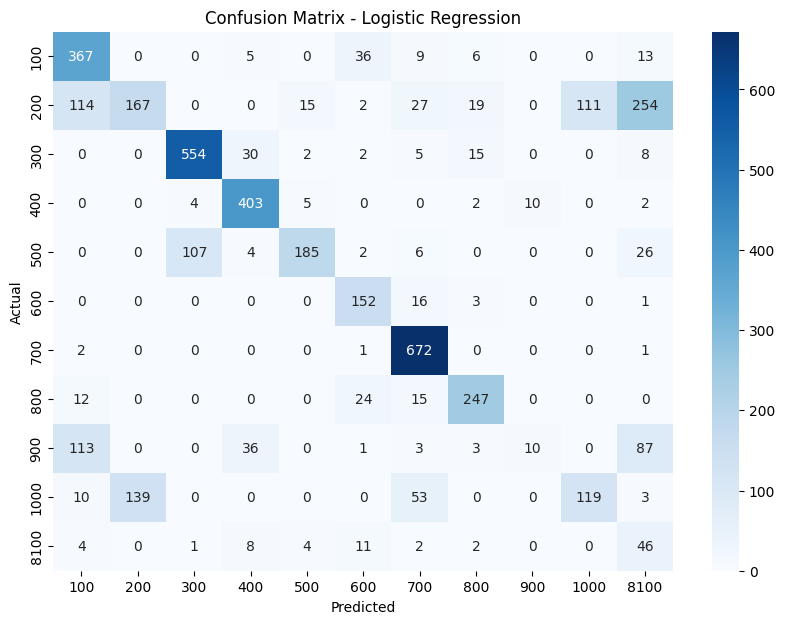


🔍 Đang huấn luyện mô hình: Extra Trees
AUROC của Extra Trees: 0.9549
              precision    recall  f1-score   support

         100       0.49      1.00      0.66       436
         200       0.35      0.15      0.21       709
         300       0.85      0.99      0.91       616
         400       0.98      0.93      0.95       426
         500       1.00      0.75      0.85       330
         600       0.88      0.04      0.08       172
         700       0.93      0.99      0.96       676
         800       0.80      0.85      0.82       298
         900       0.84      0.70      0.76       253
        1000       0.95      0.13      0.23       324
        8100       0.05      0.28      0.08        78

    accuracy                           0.69      4318
   macro avg       0.74      0.62      0.59      4318
weighted avg       0.76      0.69      0.66      4318



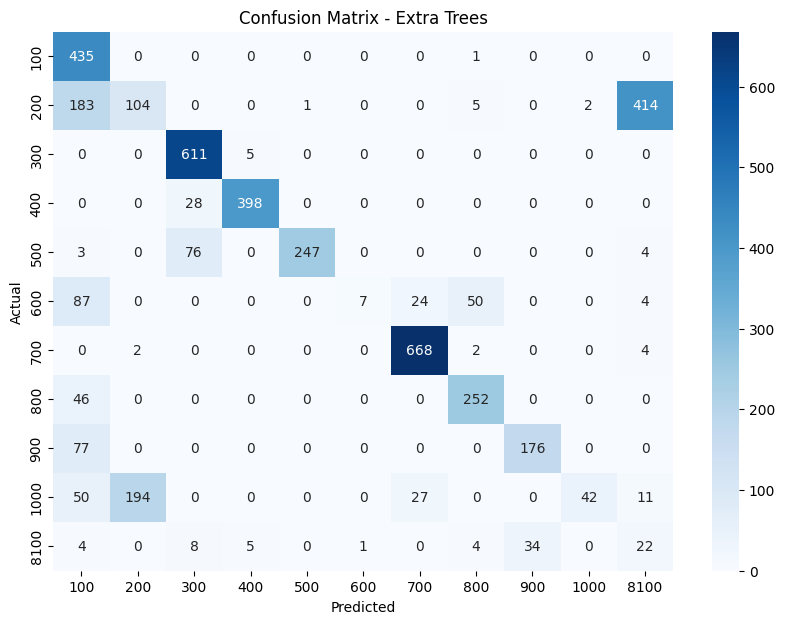


🔍 Đang huấn luyện mô hình: KNN (K-Nearest Neighbors)
AUROC của KNN (K-Nearest Neighbors): 0.7819
              precision    recall  f1-score   support

         100       0.57      0.74      0.64       436
         200       0.61      0.36      0.45       709
         300       0.55      0.24      0.33       616
         400       0.89      0.87      0.88       426
         500       0.22      0.17      0.19       330
         600       0.15      0.46      0.22       172
         700       0.66      0.78      0.71       676
         800       0.41      0.45      0.43       298
         900       0.74      0.10      0.18       253
        1000       0.50      0.57      0.53       324
        8100       0.03      0.13      0.05        78

    accuracy                           0.49      4318
   macro avg       0.48      0.44      0.42      4318
weighted avg       0.56      0.49      0.49      4318



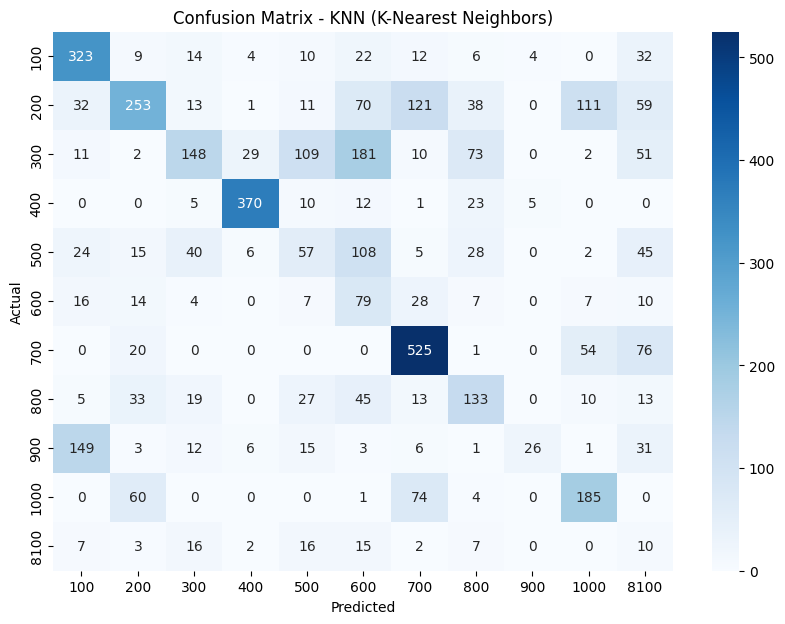


🔍 Đang huấn luyện mô hình: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:17] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:17] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


AUROC của XGBoost: 0.9295
              precision    recall  f1-score   support

         100       0.64      0.80      0.71       436
         200       0.44      0.24      0.31       709
         300       0.75      0.95      0.84       616
         400       0.97      0.85      0.90       426
         500       0.97      0.10      0.18       330
         600       0.59      0.49      0.53       172
         700       0.94      0.88      0.91       676
         800       0.68      0.91      0.78       298
         900       0.65      0.94      0.77       253
        1000       0.72      0.28      0.41       324
        8100       0.02      0.15      0.04        78

    accuracy                           0.65      4318
   macro avg       0.67      0.60      0.58      4318
weighted avg       0.72      0.65      0.64      4318



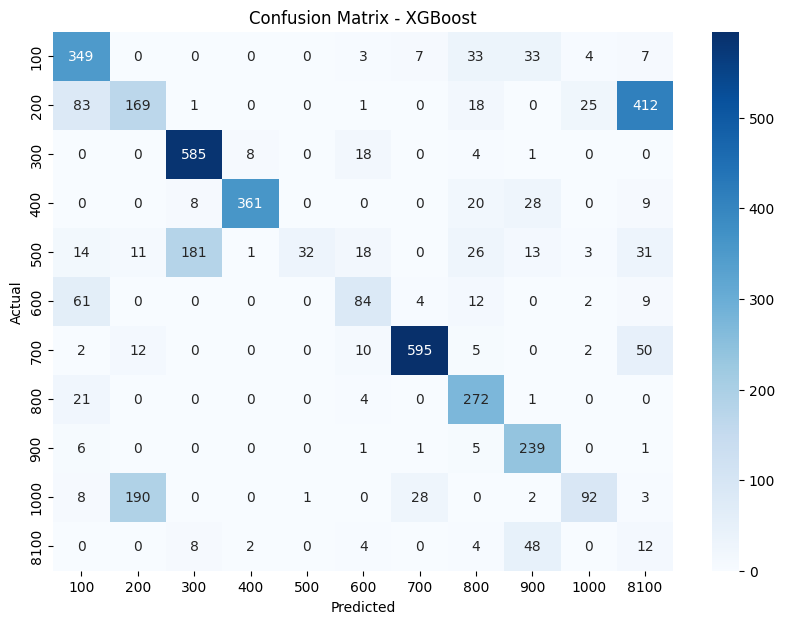


🔍 Đang huấn luyện mô hình: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14820
[LightGBM] [Info] Number of data points in the train set: 16654, number of used features: 60
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

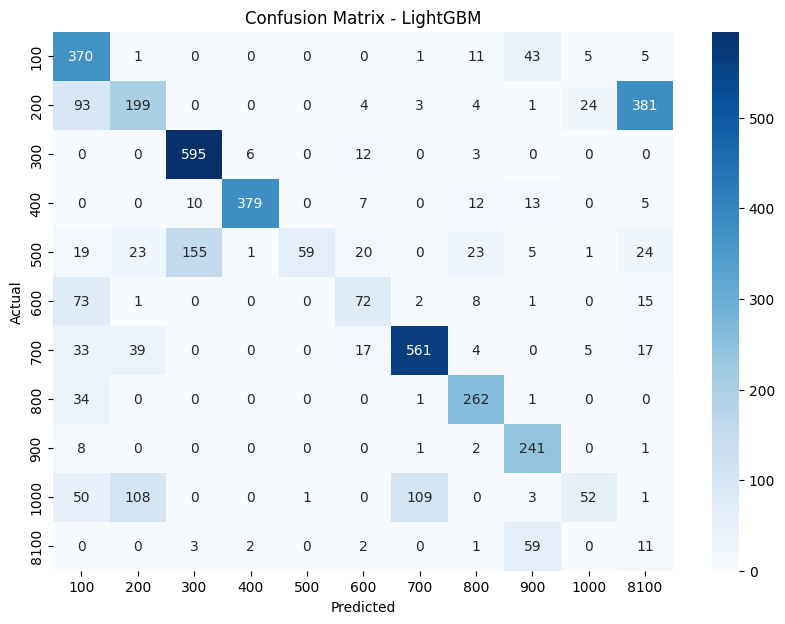

In [82]:
# Các model sẽ thử nghiệm
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier
     (
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        tree_method='hist',
        device='cuda'
    ),
    "LightGBM": LGBMClassifier
     (
        n_estimators=200,
        learning_rate=0.1
      )
}

# Huấn luyện và đánh giá từng model
for model_name, model in models.items():
    print(f"\n🔍 Đang huấn luyện mô hình: {model_name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_encoded = model.predict(X_test)

    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if len(np.unique(y_test_encoded)) == 2:
            auc = roc_auc_score(y_test_encoded, y_pred_proba[:, 1], average='macro')
        else:
            auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')
        print(f"AUROC của {model_name}: {auc:.4f}")
    else:
        print(f"{model_name} không hỗ trợ predict_proba().")

    print(classification_report(y_test_original, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test_original, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()